# CIFAR10 with different CNN architecture

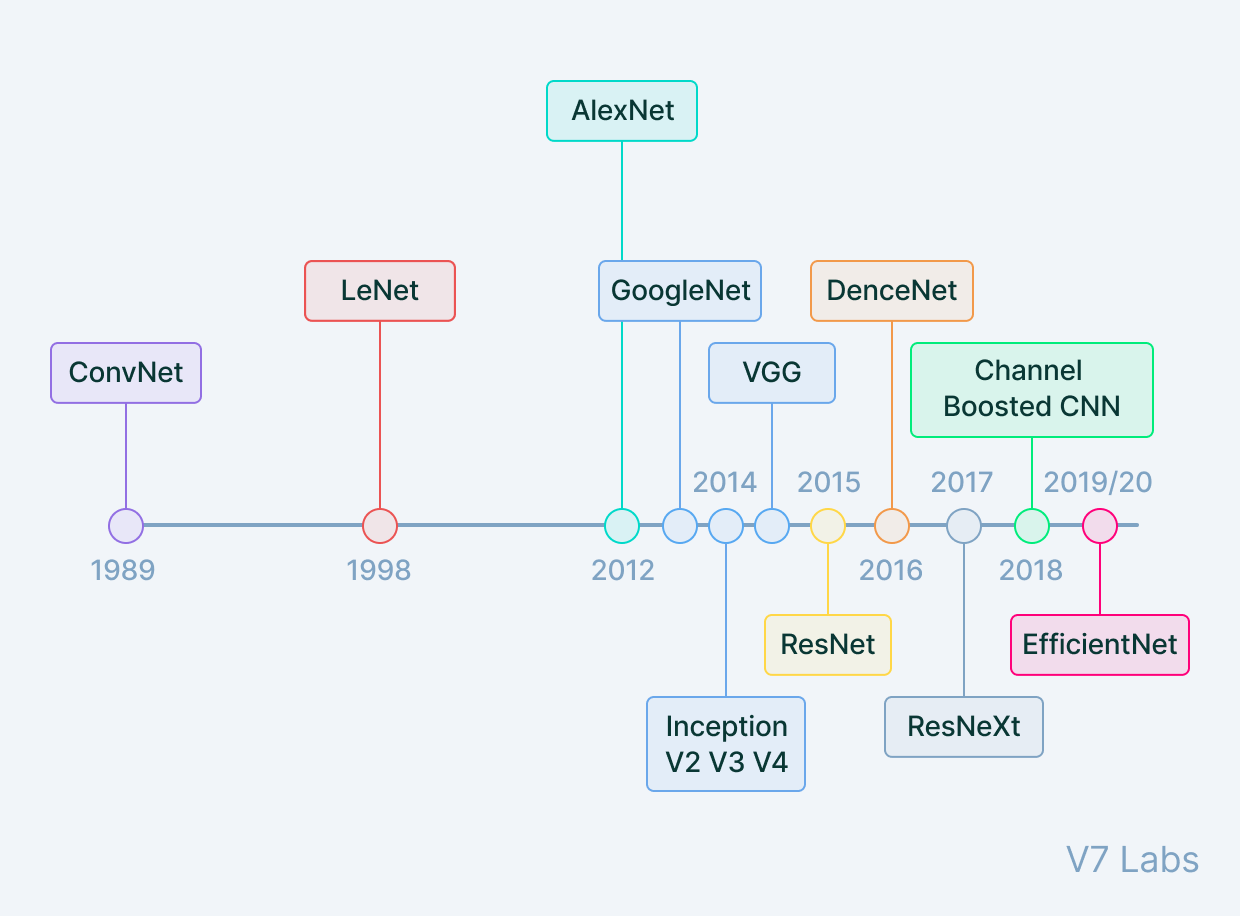


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import os, sys
import warnings
warnings.filterwarnings('ignore')

os.getcwd()
import pickle
from prettytable import PrettyTable
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po
from plotly.subplots import make_subplots


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import plot_model ,to_categorical

In [3]:

! pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.1 MB/s eta 0:00:00


In [4]:
print(tf.__version__)

2.14.0


#  CIFAR10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
cifar10 = keras.datasets.cifar10

In [6]:
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [7]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [8]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [11]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
train_labels=train_labels.flatten()
test_labels=test_labels.flatten()

In [13]:
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [15]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [16]:
num_classes = len(class_name)
num_classes

10

In [18]:
# One-hot encode the labels
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

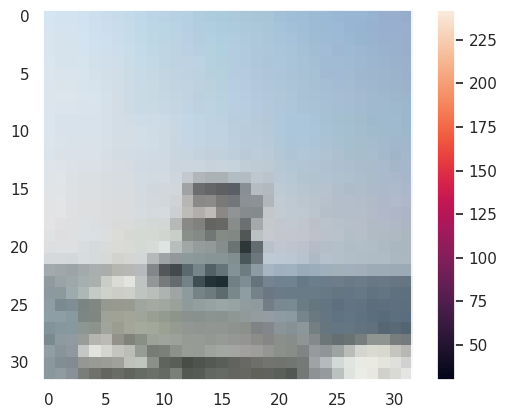

In [19]:
plt.figure()
plt.imshow( train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()
# the scale is between 0-255

#Preprocessing - min max approach

In [20]:
train_images = train_images/255.0
test_images = test_images/255.0

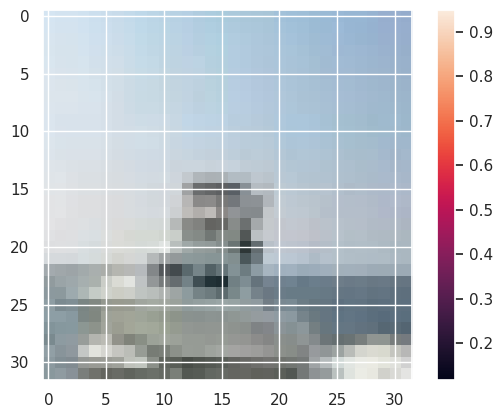

In [21]:
plt.figure()
plt.imshow( train_images[100])
plt.colorbar()
plt.grid('True')
plt.show()

# observe that the scale is changed  between 0 to 1

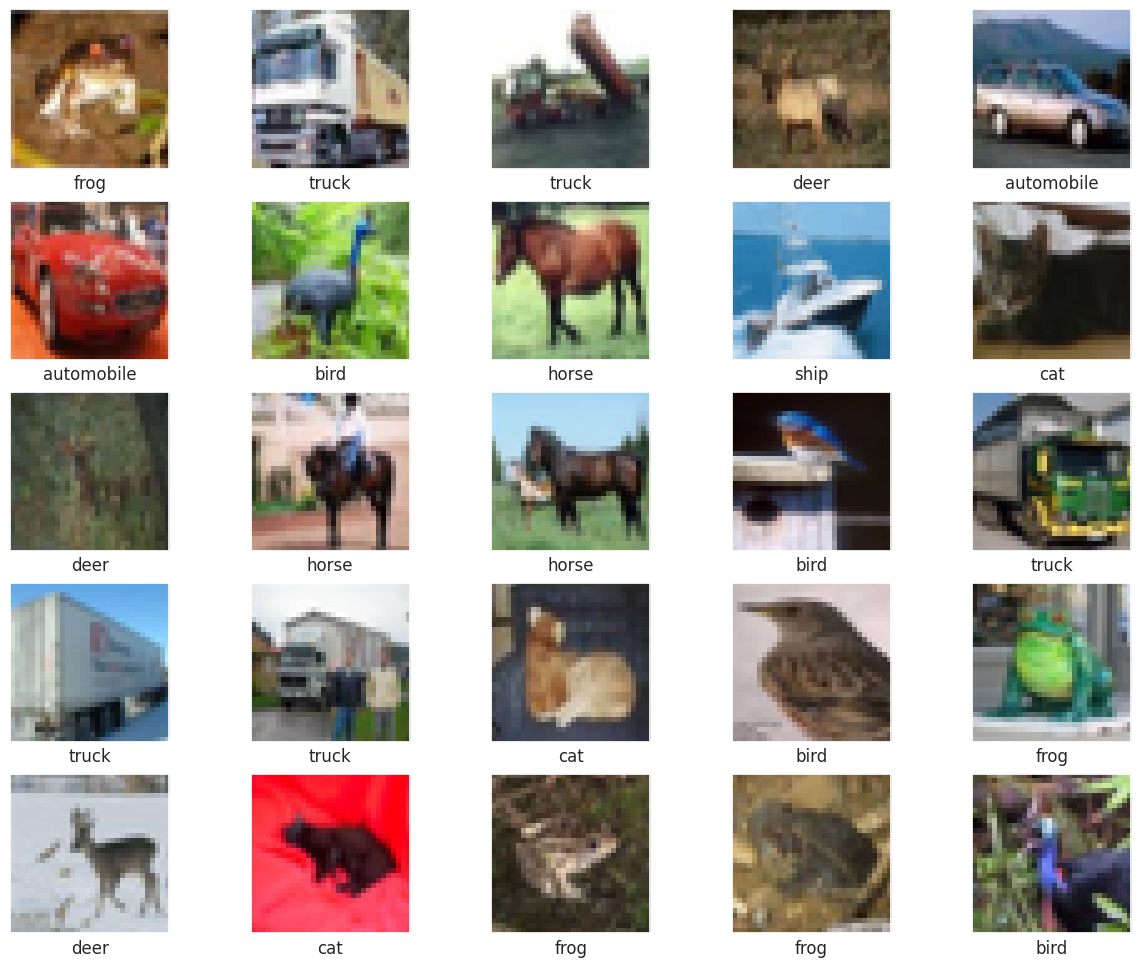

In [22]:
# sample images from the dataset

plt.figure(figsize=(15,12))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_name[train_labels[i]])

plt.show()

In [23]:
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Tensorboard

In [25]:
# Tensorboard
import os
import datetime
logdir = os.path.join('logs1', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
print(logdir)

logs1/20231027-050412


In [26]:
%reload_ext tensorboard
%tensorboard --logdir $logdir

<IPython.core.display.Javascript object>

In [27]:
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Custom Convolutional Neural Network(CNN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4215114 (16.08 MB)
Trainable params: 42151

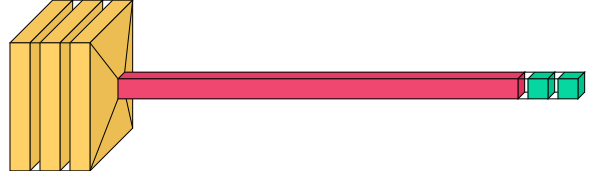

In [28]:
from keras.layers import Conv2D
# API
model=Sequential()

#CNN Layers
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(32,32,3)))
              # 32*32  and mask is 3*3>>> 28-3+1= 26*26  .Note that we are using valid Padding . If we use 'same' padding , we will get same pixel size
              # params> ((3*3)(filter size)*3(channels)+1(bais))*32 > 896
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
#trainable parameter > (3*3*32(previous layer)+1(bais)) *32  > 9248 ( 3 channel not considering as its only applied to input layer)


model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
#trainable parameter > (3*3*32(previous layer)+1(bais)) *32  > 9248 ( 3 channel not considering as its only applied to input layer)


model.add(Flatten())
# input image 32*32 as we have used same padding
#after flattening> 32*32 *32 > 32768

model.add(Dense(128 , activation='relu'))
# params 128*32768 + 128 > 4194432


model.add(Dense(10 , activation='softmax'))
#params > 128*10+10 > 1290

#Analyze
model.summary()
visualkeras.layered_view(model)


In [29]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history=model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=128 , epochs=20)

Epoch 1/20
391/391 [==============================] - 16s 15ms/step - loss: 1.4689 - accuracy: 0.4740 - val_loss: 1.2862 - val_accuracy: 0.5450
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 1.0643 - accuracy: 0.6263 - val_loss: 1.0248 - val_accuracy: 0.6376
Epoch 3/20
391/391 [==============================] - 4s 11ms/step - loss: 0.8464 - accuracy: 0.7027 - val_loss: 0.9789 - val_accuracy: 0.6587
Epoch 4/20
391/391 [==============================] - 5s 13ms/step - loss: 0.6477 - accuracy: 0.7744 - val_loss: 0.9896 - val_accuracy: 0.6656
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.4387 - accuracy: 0.8489 - val_loss: 1.1144 - val_accuracy: 0.6574
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.2581 - accuracy: 0.9125 - val_loss: 1.4201 - val_accuracy: 0.6435
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.1398 - accuracy: 0.9546 - val_loss: 1.7146 - val_accuracy: 0.647

Text(0.5, 1.0, 'Loss per Epoch')

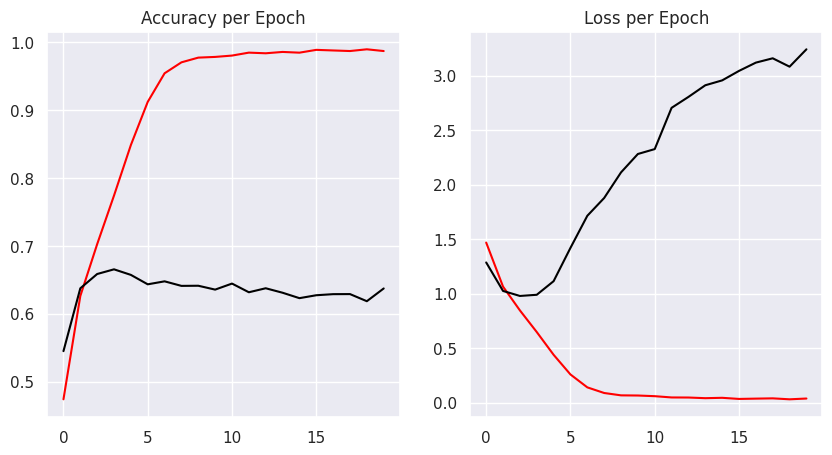

In [30]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'], color='red',)
plt.plot(history.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')
plt.title('Loss per Epoch')

In [31]:
def image_evaluation(model, classes, X_test, y_test):
    y_pred_model = model.predict(X_test)
    y_pred = np.argmax(y_pred_model, axis=1)

    fig, axes = plt.subplots(5, 8, figsize=(14, 8))
    for i in range(0, 40):
        plt.subplot(5, 8, i + 1)
        plt.imshow(X_test[i])
        class_name_true = classes[y_test[i]]
        class_name_pred = classes[y_pred[i]]
        plt.title(f'True: {class_name_true}\nPredict: {class_name_pred}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Image Prediction
313/313 [==============================] - 2s 6ms/step


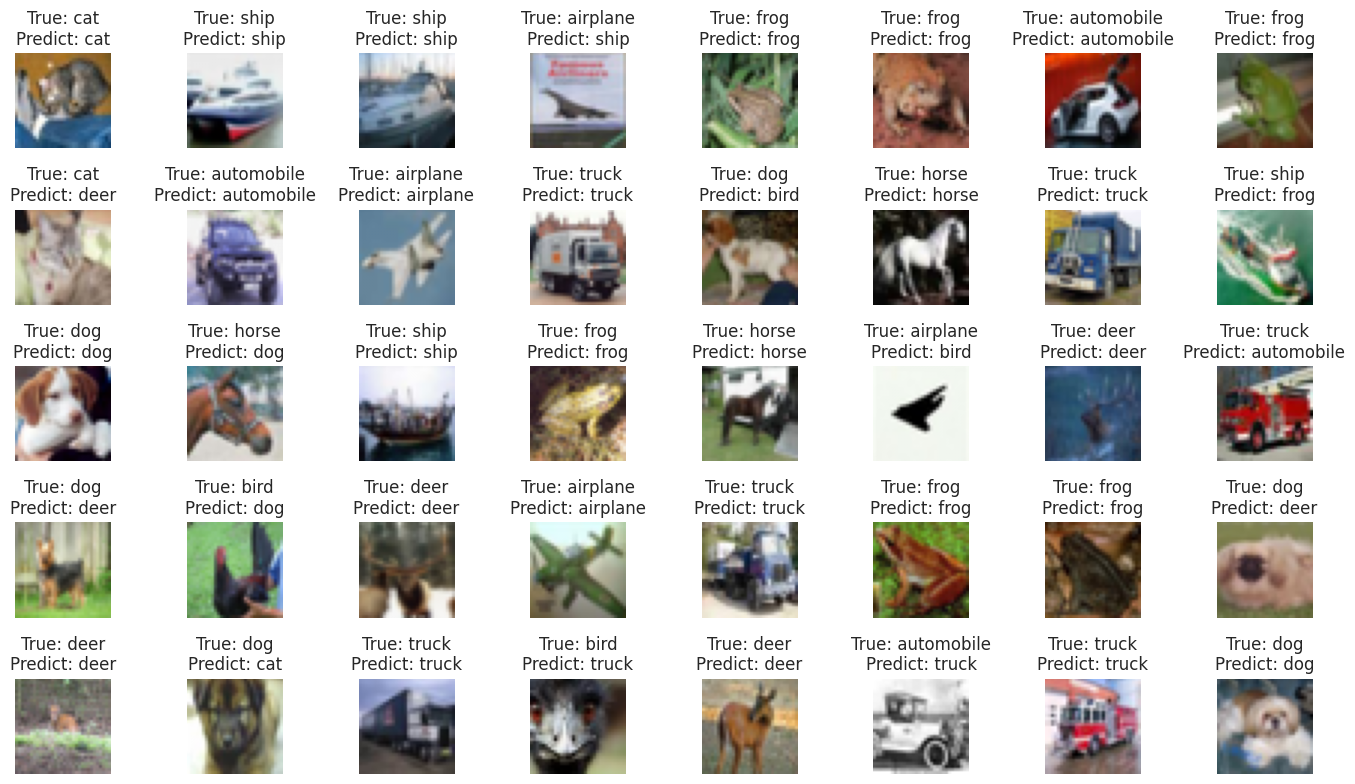

In [32]:
print("Image Prediction")
image_evaluation(model,class_name, test_images, test_labels)

#Custom CNN with MaxPooling

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

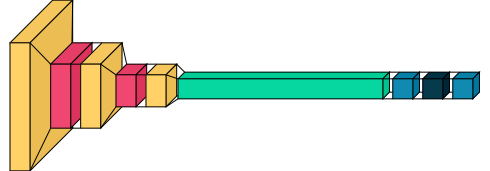

In [33]:
from keras.layers import MaxPooling2D
# API
modelCNN1=Sequential()

#CNN Layers
modelCNN1.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=(32,32,3)))
modelCNN1.add(MaxPooling2D(2,2))
modelCNN1.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
modelCNN1.add(MaxPooling2D(2,2))
modelCNN1.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))

# DNN layers
modelCNN1.add(Flatten())
modelCNN1.add(Dense(128 , activation='relu'))
modelCNN1.add(Dropout(0.3))
modelCNN1.add(Dense(10 , activation='softmax'))

#Analyze
modelCNN1.summary()
visualkeras.layered_view(modelCNN1)



In [34]:

#Compiling
modelCNN1.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history1=modelCNN1.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=128 , epochs=20)

Epoch 1/20
391/391 [==============================] - 7s 8ms/step - loss: 1.5922 - accuracy: 0.4188 - val_loss: 1.2711 - val_accuracy: 0.5400
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2544 - accuracy: 0.5537 - val_loss: 1.1390 - val_accuracy: 0.5954
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1136 - accuracy: 0.6048 - val_loss: 1.1117 - val_accuracy: 0.6043
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0115 - accuracy: 0.6445 - val_loss: 0.9446 - val_accuracy: 0.6683
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.9461 - accuracy: 0.6691 - val_loss: 0.9523 - val_accuracy: 0.6582
Epoch 6/20
391/391 [==============================] - 3s 6ms/step - loss: 0.8891 - accuracy: 0.6873 - val_loss: 0.8744 - val_accuracy: 0.6926
Epoch 7/20
391/391 [==============================] - 3s 6ms/step - loss: 0.8310 - accuracy: 0.7087 - val_loss: 0.8422 - val_accuracy: 0.7066
Epoch 

Text(0.5, 1.0, 'Loss per Epoch')

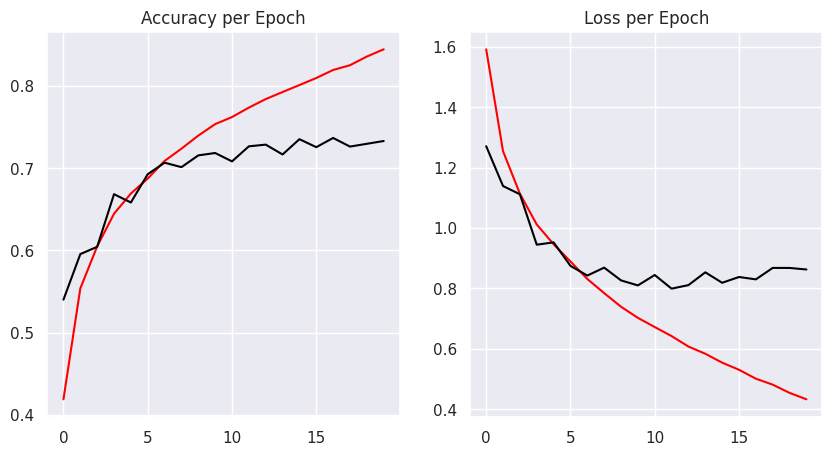

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history1.history['accuracy'], color='red',)
plt.plot(history1.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history1.history['loss'], color='red')
plt.plot(history1.history['val_loss'], color='black')
plt.title('Loss per Epoch')

In [39]:
test_loss, test_acc = modelCNN1.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8624 - accuracy: 0.7330
Test accuracy: 0.733


Image Prediction
313/313 [==============================] - 1s 2ms/step


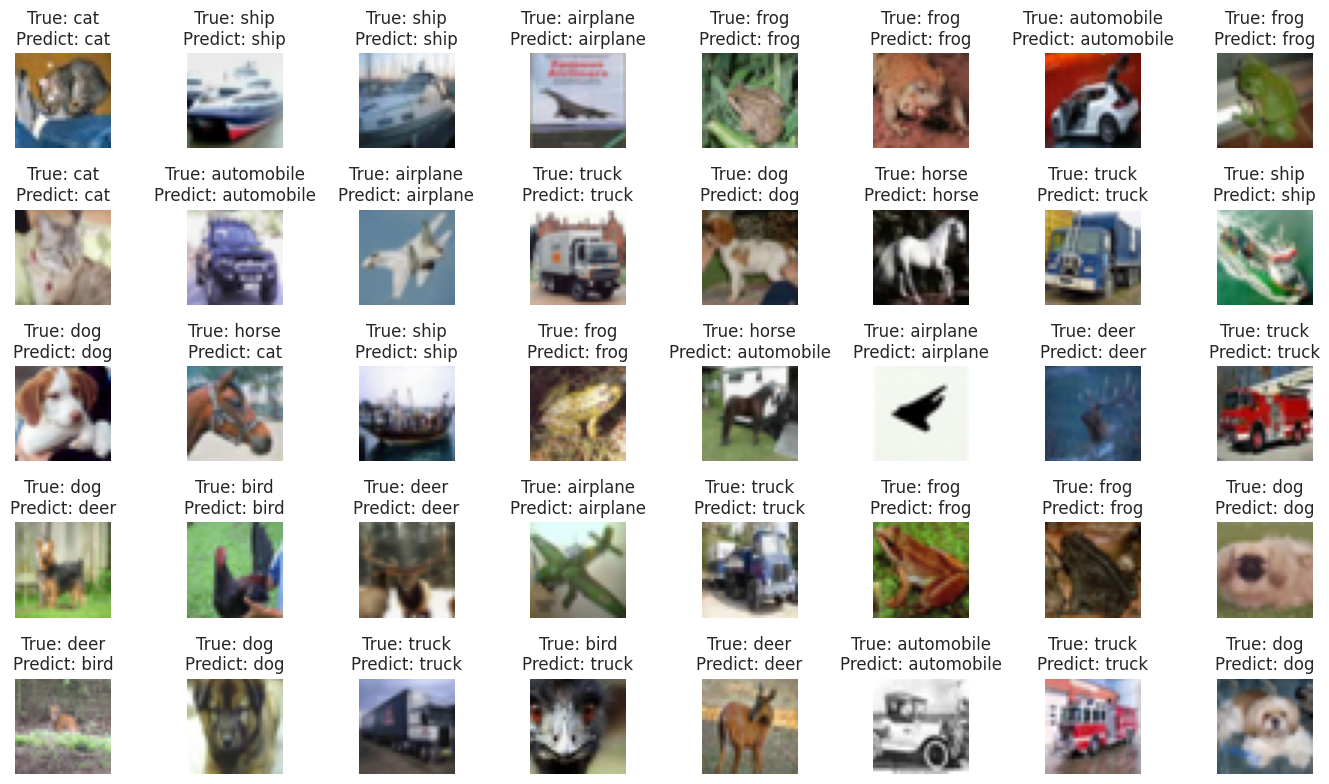

In [37]:
print("Image Prediction")
image_evaluation(modelCNN1,class_name, test_images, test_labels)

# CNN tuning
* remove padding
* increase filter size to 64
* reduce Dense hidden layer
* Dropout

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

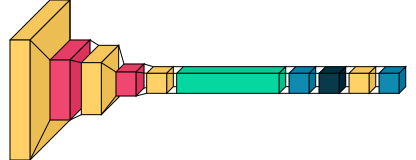

In [40]:
from keras.layers import MaxPooling2D
# API
modelCNN2=Sequential()

#CNN Layers
modelCNN2.add(Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)))
modelCNN2.add(MaxPooling2D(2,2))
modelCNN2.add(Conv2D(64, kernel_size=(3,3), activation='relu')) #  input is 26*26 , filetr 3*3 >>> 26-3+1>>>>>>> 24*24
modelCNN2.add(MaxPooling2D(2,2))
modelCNN2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))# input is 24*24 , filter 3*3 >>> 24-3+1>>>>>>>22*22

# DNN layers
modelCNN2.add(Flatten()) # 22*22 >>484
modelCNN2.add(Dense(64, activation='relu'))
modelCNN2.add(Dropout(0.2))
modelCNN2.add(BatchNormalization())
modelCNN2.add(Dense(10 , activation='softmax'))

#Analyze
modelCNN2.summary()
visualkeras.layered_view(modelCNN2)




In [41]:
modelCNN2.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history2= modelCNN2.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=128 , epochs=20)

Epoch 1/20
391/391 [==============================] - 8s 11ms/step - loss: 1.6290 - accuracy: 0.4063 - val_loss: 1.4301 - val_accuracy: 0.5338
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.2449 - accuracy: 0.5580 - val_loss: 1.1481 - val_accuracy: 0.5823
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0991 - accuracy: 0.6107 - val_loss: 1.0210 - val_accuracy: 0.6396
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9955 - accuracy: 0.6508 - val_loss: 0.9729 - val_accuracy: 0.6640
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 0.9319 - accuracy: 0.6726 - val_loss: 0.9856 - val_accuracy: 0.6613
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 0.8636 - accuracy: 0.6954 - val_loss: 0.8629 - val_accuracy: 0.6969
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8165 - accuracy: 0.7155 - val_loss: 0.8809 - val_accuracy: 0.6884
Epoc

Text(0.5, 1.0, 'Loss per Epoch')

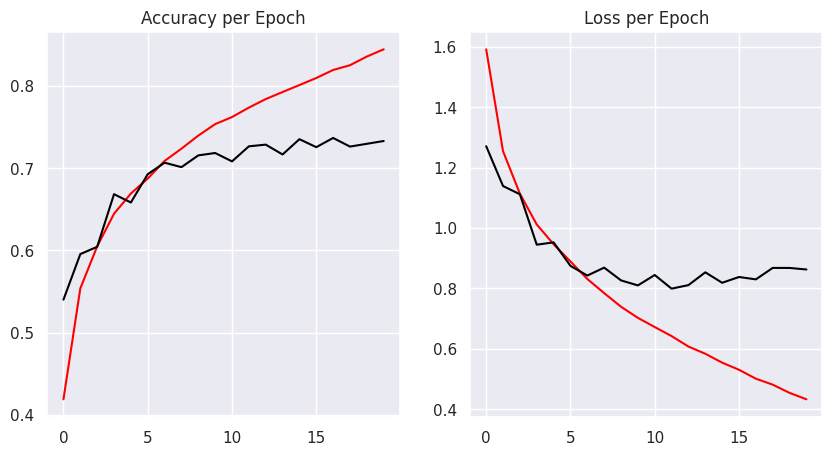

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history1.history['accuracy'], color='red',)
plt.plot(history1.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history1.history['loss'], color='red')
plt.plot(history1.history['val_loss'], color='black')
plt.title('Loss per Epoch')

In [43]:
test_loss, test_acc = modelCNN2.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.8837 - accuracy: 0.7179
Test accuracy: 0.718


Image Prediction
313/313 [==============================] - 1s 2ms/step


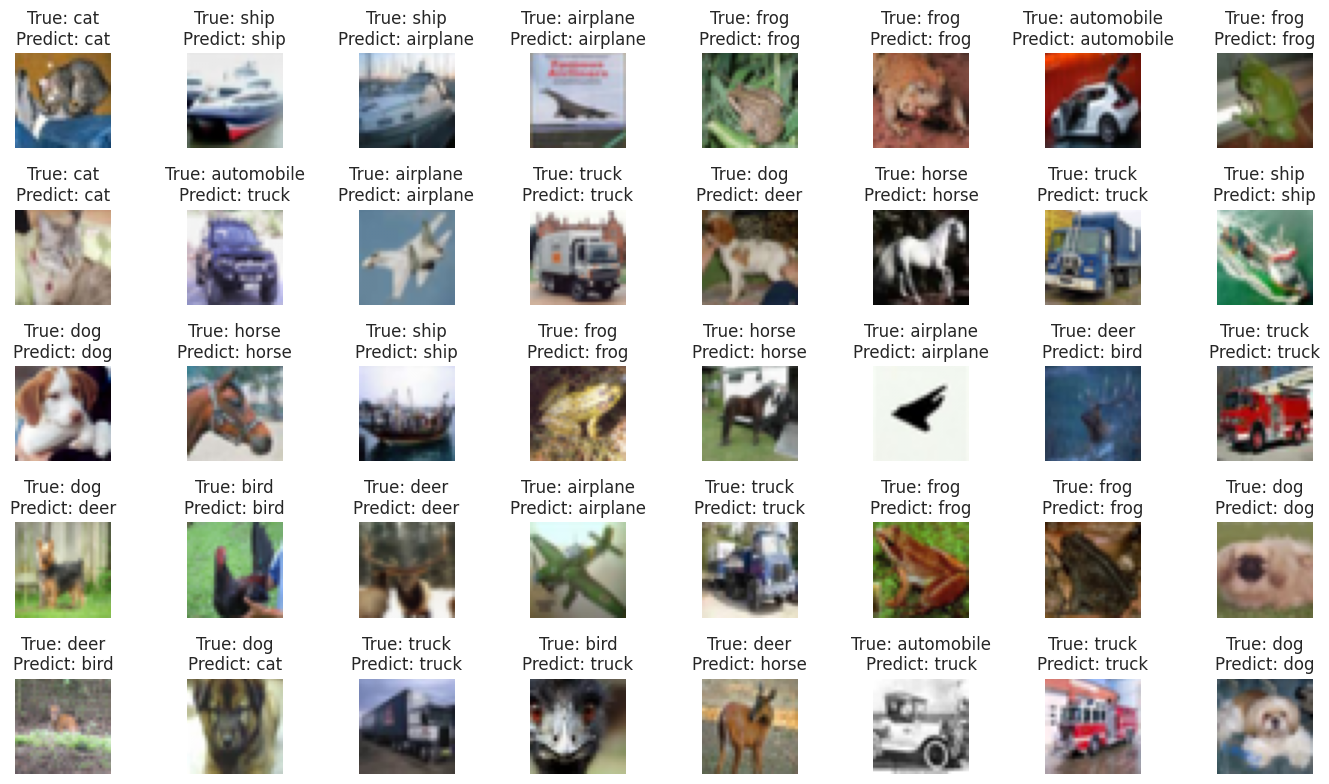

In [45]:
print("Image Prediction")
image_evaluation(modelCNN2,class_name, test_images, test_labels)

# LeNet5 Model

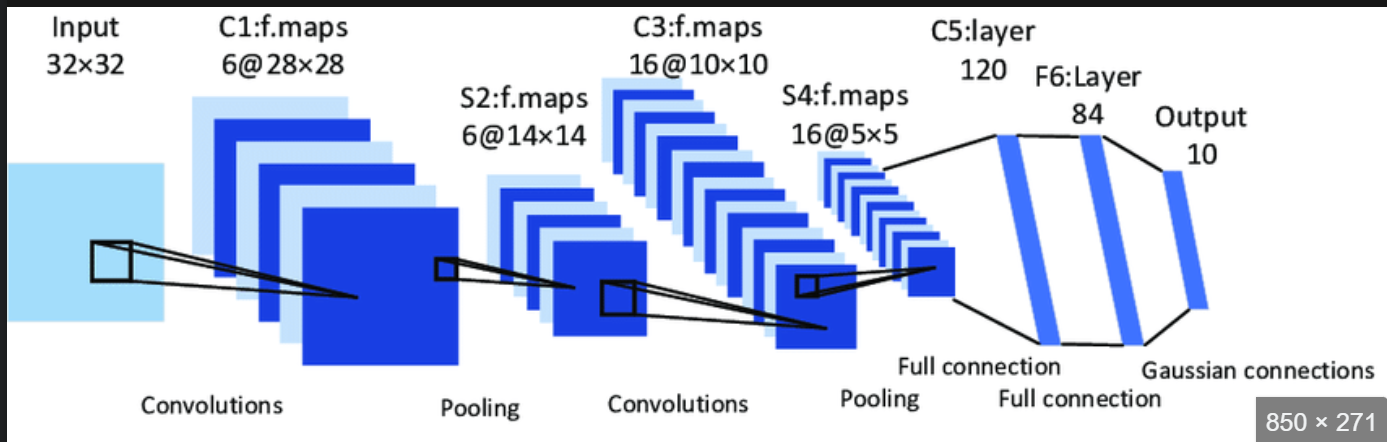

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

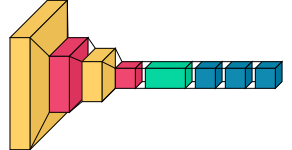

In [46]:
lenet5=Sequential()

#Convolutional LAyer 1
lenet5.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))

#Average Pooling LAyer 1
lenet5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))

#Convolutional LAyer 2
lenet5.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))

#Average Pooling LAyer 2
lenet5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))


##Deep Neural Network

lenet5.add(Flatten())
lenet5.add(Dense(120, activation='relu'))
lenet5.add(Dense(84, activation='relu'))

#output layer

lenet5.add(Dense(10, activation='softmax'))

lenet5.summary()
visualkeras.layered_view(lenet5)


In [47]:
lenet5.compile(optimizer='adam' , loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history=lenet5.fit(train_images, y_train, validation_data=(test_images, y_test), batch_size=128 , epochs=20)


Epoch 1/20
391/391 [==============================] - 8s 11ms/step - loss: 1.7246 - accuracy: 0.3696 - val_loss: 1.5101 - val_accuracy: 0.4540
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 1.4153 - accuracy: 0.4909 - val_loss: 1.3363 - val_accuracy: 0.5203
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 1.2949 - accuracy: 0.5359 - val_loss: 1.2968 - val_accuracy: 0.5360
Epoch 4/20
391/391 [==============================] - 4s 11ms/step - loss: 1.2239 - accuracy: 0.5668 - val_loss: 1.2185 - val_accuracy: 0.5711
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 1.1709 - accuracy: 0.5844 - val_loss: 1.1809 - val_accuracy: 0.5777
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1213 - accuracy: 0.6062 - val_loss: 1.1393 - val_accuracy: 0.5946
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0733 - accuracy: 0.6199 - val_loss: 1.1210 - val_accuracy: 0.6002
Ep

Text(0.5, 1.0, 'Lenet5 Loss per Epoch')

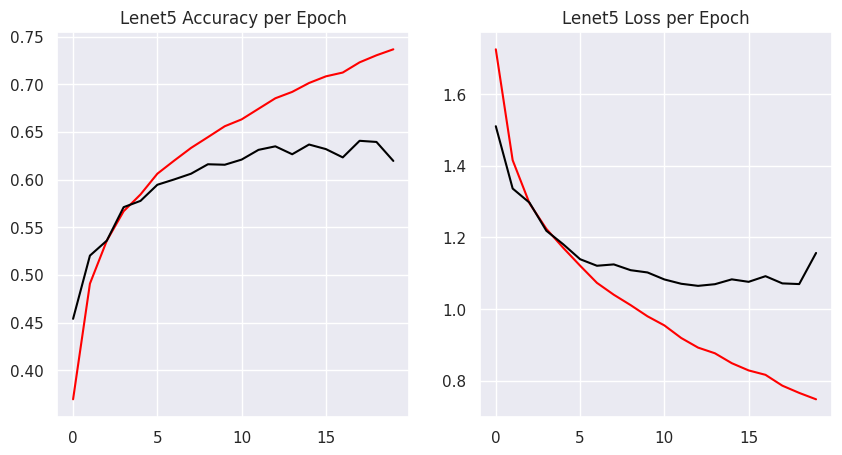

In [50]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'], color='red',)
plt.plot(history.history['val_accuracy'], color='black')
plt.title('Lenet5 Accuracy per Epoch')

plt.subplot(122)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')
plt.title('Lenet5 Loss per Epoch')

In [51]:
test_loss, test_acc = lenet5.evaluate(test_images, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 1.1567 - accuracy: 0.6196
Test accuracy: 0.620


Image Prediction
313/313 [==============================] - 1s 2ms/step


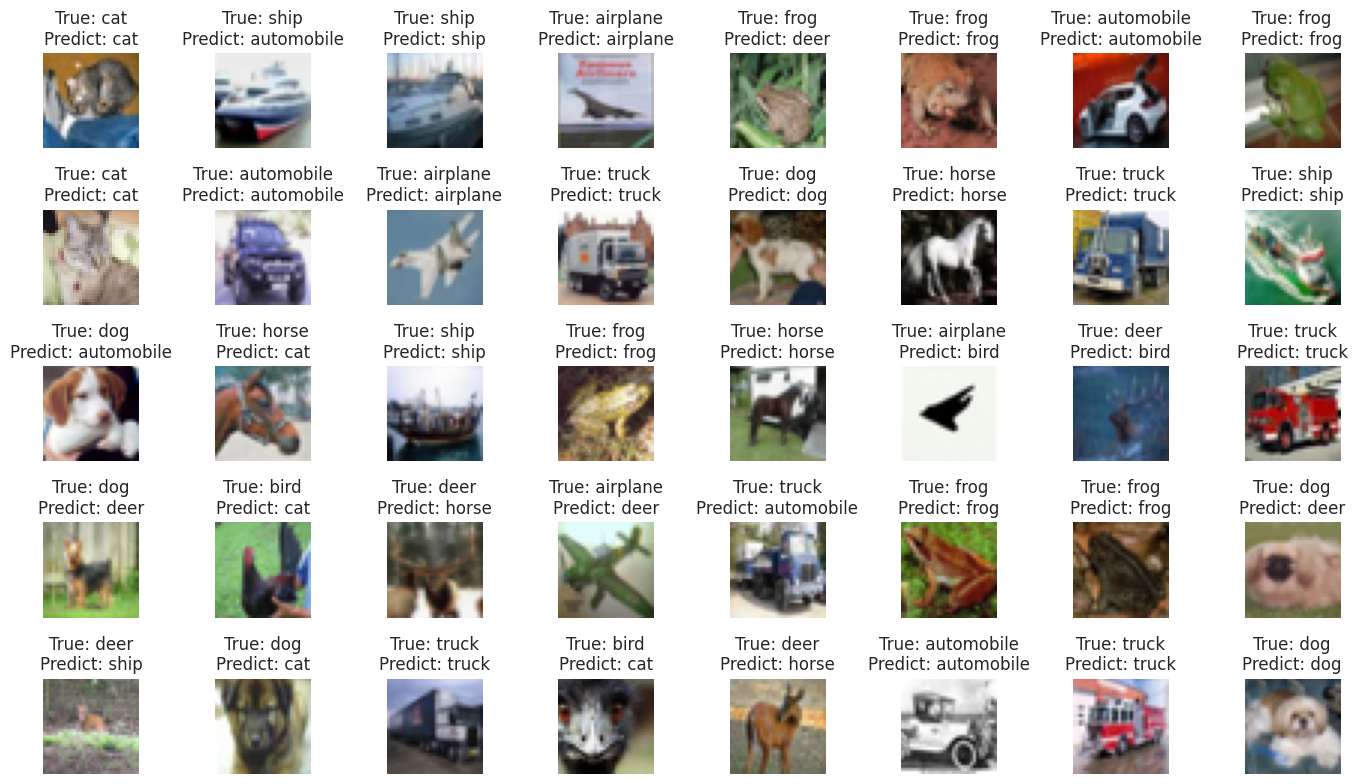

In [52]:
print("Image Prediction")
image_evaluation(lenet5,class_name, test_images, test_labels)

# Building Alexnet model


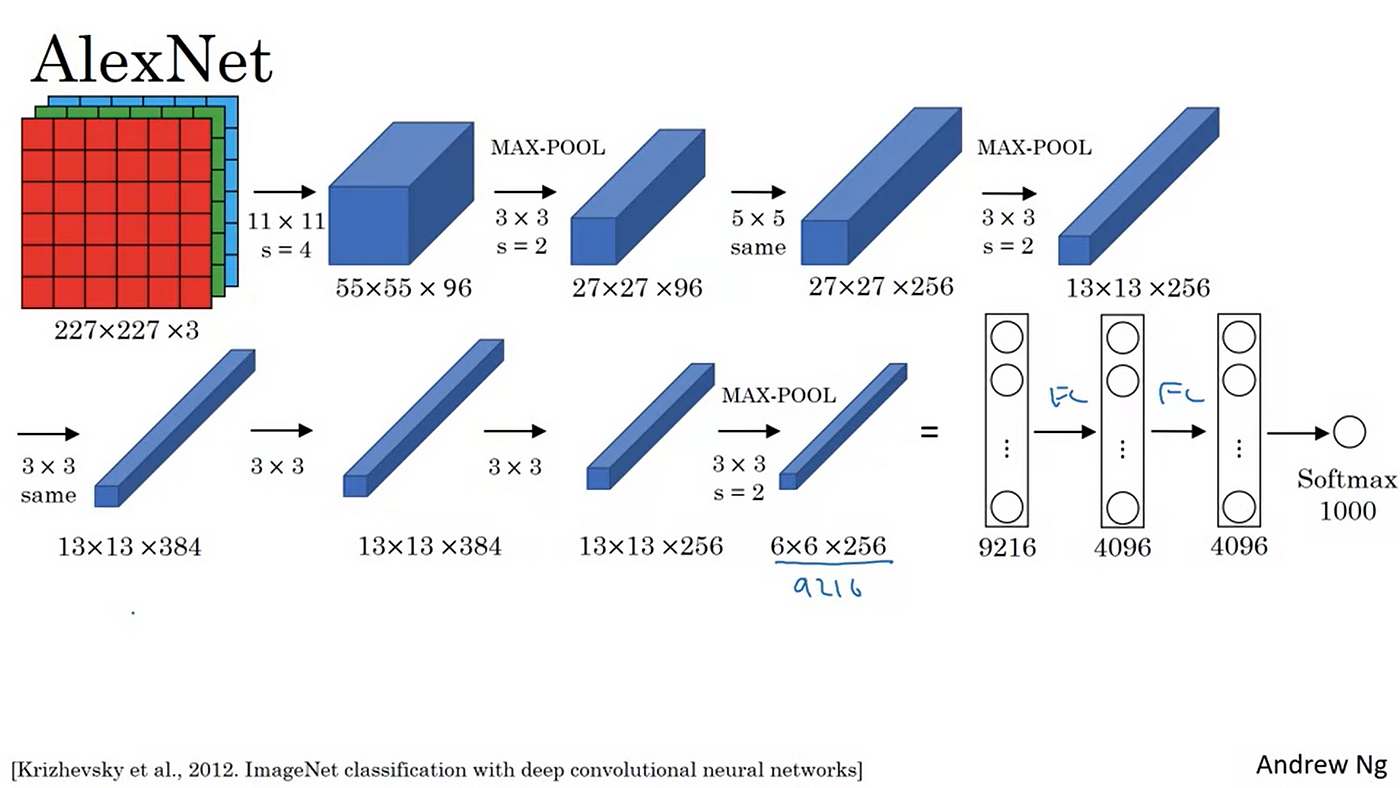

In [58]:
alexnet=Sequential()

#Layer1 Conv2D layer with Batch Normalization
alexnet.add(Conv2D(96, kernel_size=(3,3), padding='valid', strides=4, activation='relu', input_shape=(32,32,3)))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Layer2 Conv2D layer with Batch Normalization
alexnet.add(Conv2D(256, kernel_size=(3,3), padding='same', strides=1, activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Layer3,4,5 Conv2D layers
alexnet.add(Conv2D(384, kernel_size=(3,3), padding='same', strides=1, activation='relu'))
alexnet.add(Conv2D(384, kernel_size=(3,3), padding='same', strides=1, activation='relu'))
alexnet.add(Conv2D(256, kernel_size=(3,3), padding='same', strides=1, activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Deep Neural Network Layer
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(10, activation='softmax'))

alexnet.summary()
visualkeras.layered_view(alexnet)

alexnet.compile(optimizer='adam' , loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history_alexnet=alexnet.fit(train_images, y_train, validation_data=(test_images, y_test), batch_size=32 , epochs=10)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 8, 8, 96)          2688      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 4, 4, 96)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 256)         221440    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 2, 2, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 384)        

Text(0.5, 1.0, 'Loss per Epoch')

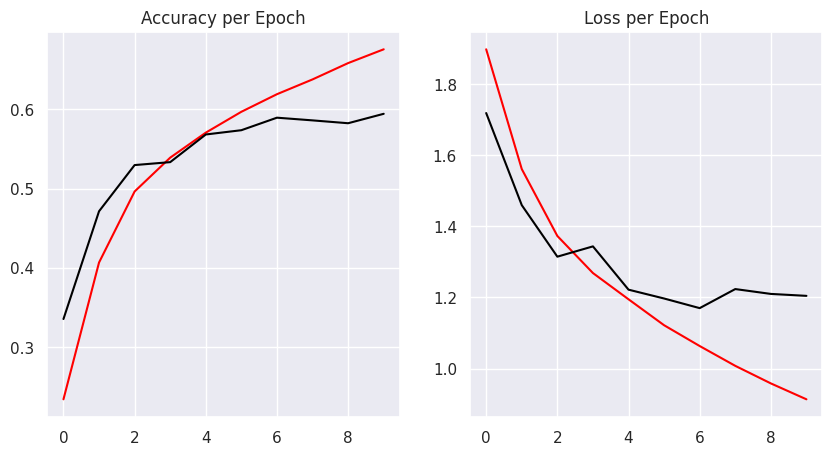

In [59]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history_alexnet.history['accuracy'], color='red',)
plt.plot(history_alexnet.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history_alexnet.history['loss'], color='red')
plt.plot(history_alexnet.history['val_loss'], color='black')
plt.title('Loss per Epoch')

In [60]:
test_loss, test_acc = alexnet.evaluate(test_images, y_test)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 5ms/step - loss: 1.2044 - accuracy: 0.5945
Test accuracy: 0.595


Image Prediction
313/313 [==============================] - 1s 2ms/step


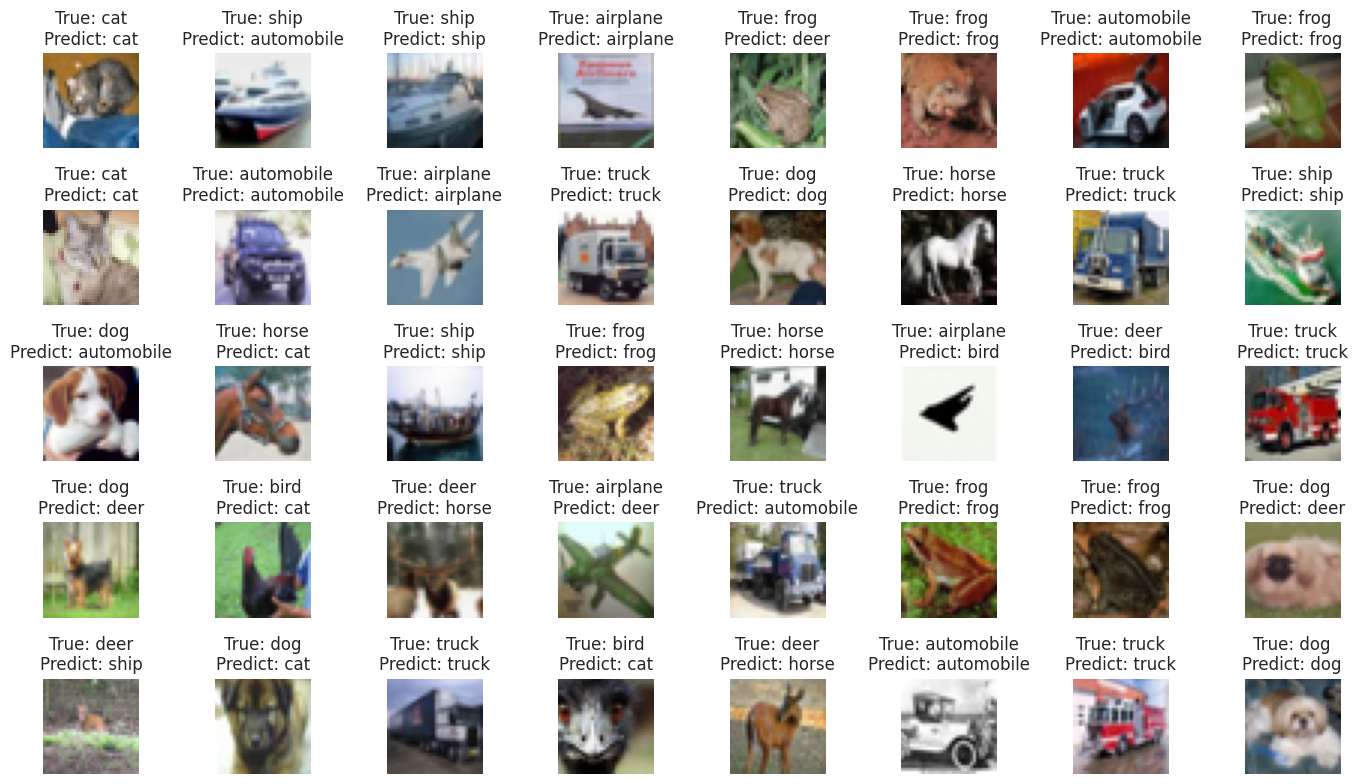

In [61]:
print("Image Prediction")
image_evaluation(lenet5,class_name, test_images, test_labels)

# VGG16 Feature Extraction Model

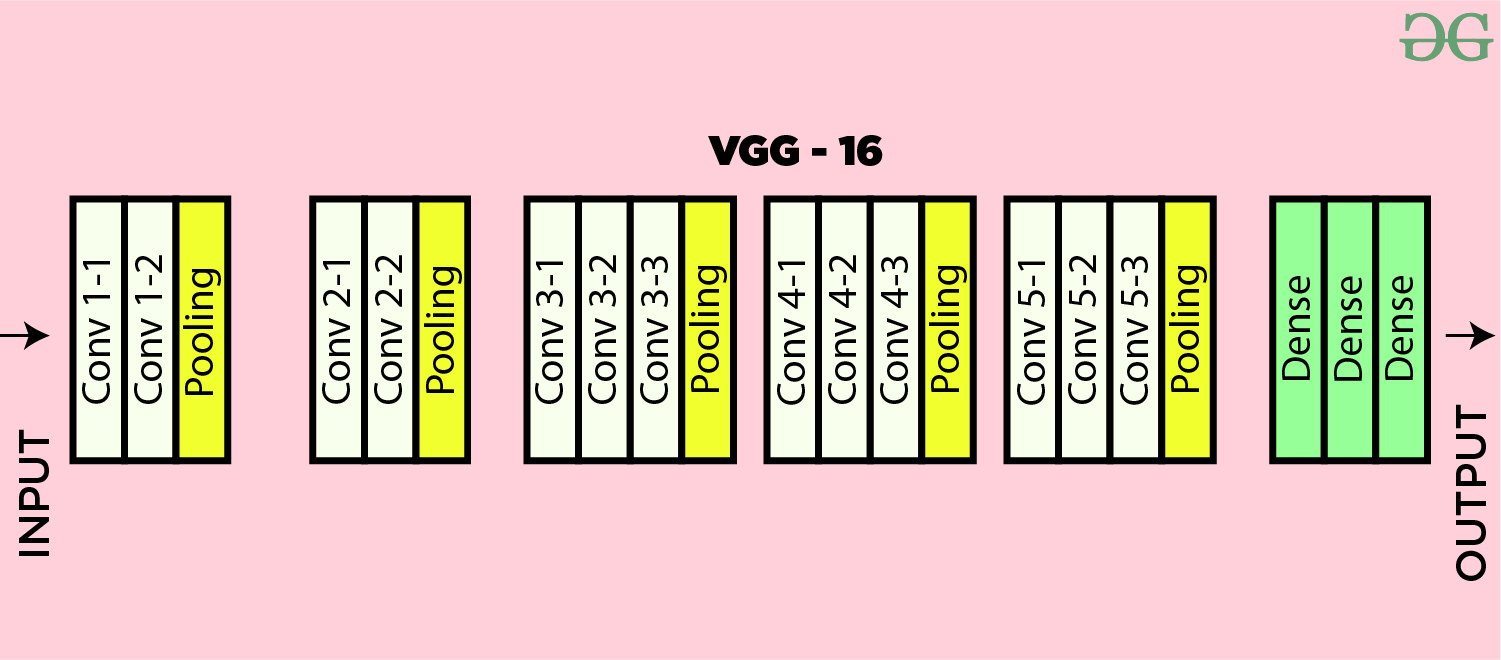


we will first freeze the convolutional base. Freezing a layer or set of
layers means preventing their weights from being updated during training. If we don’t do this, the representations that were previously learned by the convolutional base will be modified during training

 In Keras, we freeze a layer or model by setting its trainable attribute to False.

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                        

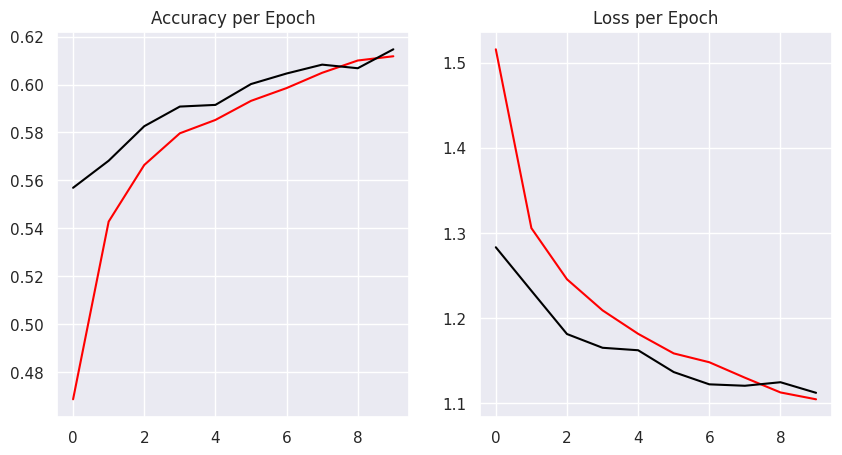

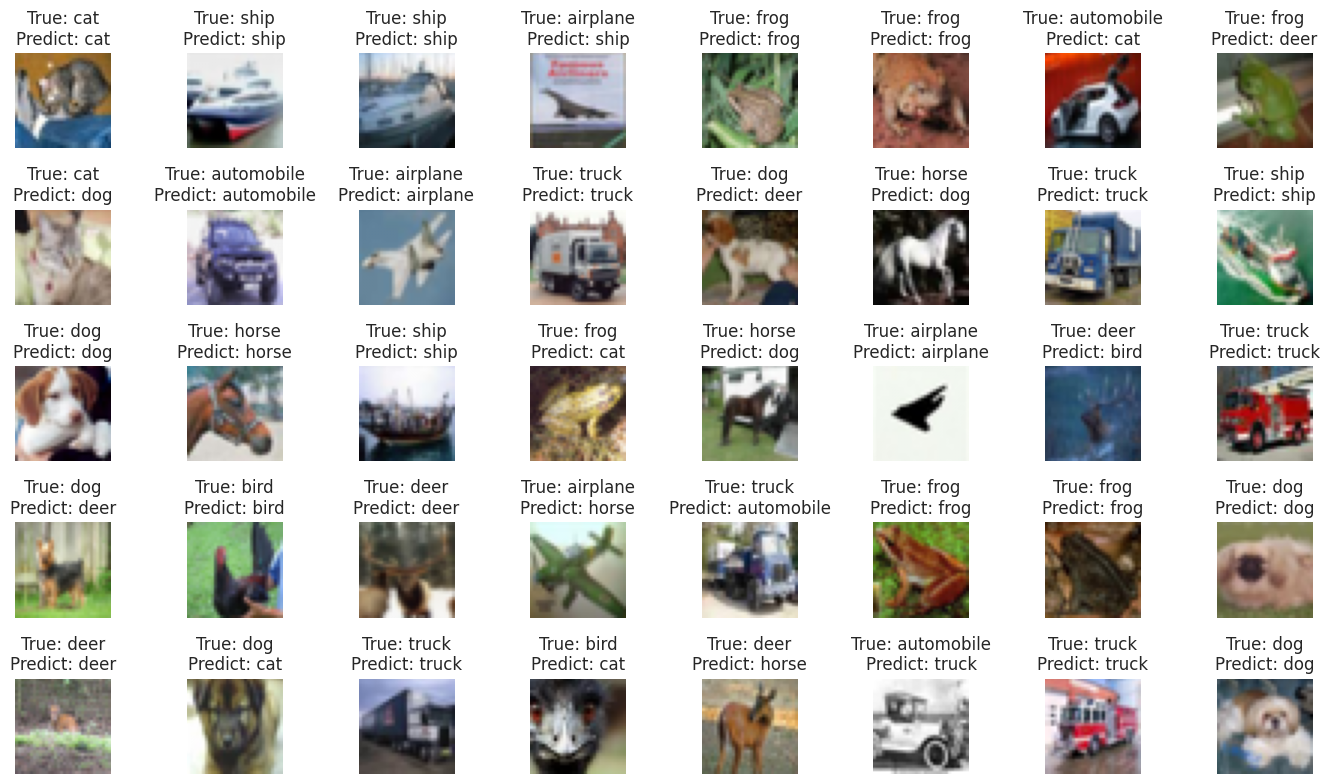

In [64]:
from keras.applications import VGG16, ResNet50

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))## By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because we intend to use our own densely
                        #connected classifier (with only two classes: cat and dog), we don’t need to include it
base_model.trainable = False
set_trainable = False
for layer in base_model.layers:
  layer.trainable = False
for layer in base_model.layers:
  print(layer.name, layer.trainable)
base_model.summary()

vgg16 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


vgg16.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = vgg16.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

#visualize the performance
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'], color='red',)
plt.plot(history.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')
plt.title('Loss per Epoch')


# Evaluate the model
test_loss, test_acc = vgg16.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

print("Image Prediction")
image_evaluation(vgg16,class_name, test_images, test_labels)

# VGG16 Fine tuning model


 Layers that come earlier in the model extract local, highly generic feature
maps (such as visual edges, colors, and textures), whereas layers that are higher up extract more-abstract concepts (such as “cat ear” or “dog eye”). So if your new dataset differs a lot from the dataset on which the original model was trained, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base
 it’s only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classifier isn’t
already trained, the error signal propagating through the network during training will be too large, and the representations previously learned by
the layers being fine-tuned will be destroyed


Method to fine tune the data is as below:
1. Add our custom network on top of an
already-trained base network.
2. Freeze the base network.
3. Train the part we added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part we
added.

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                            

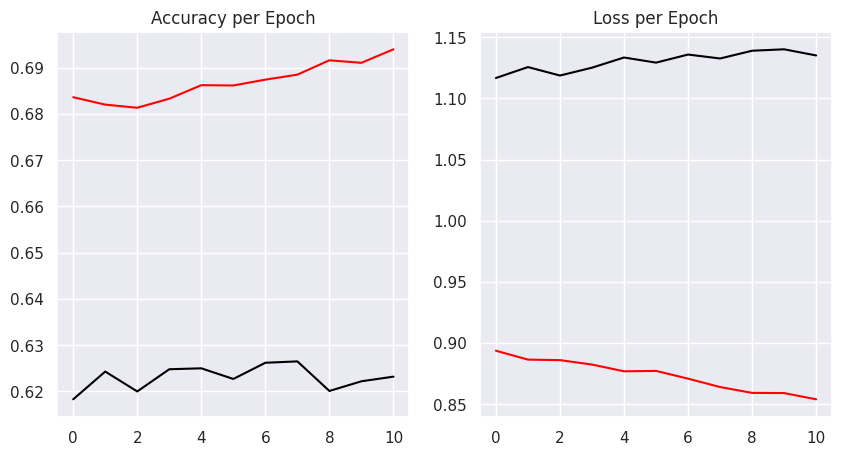

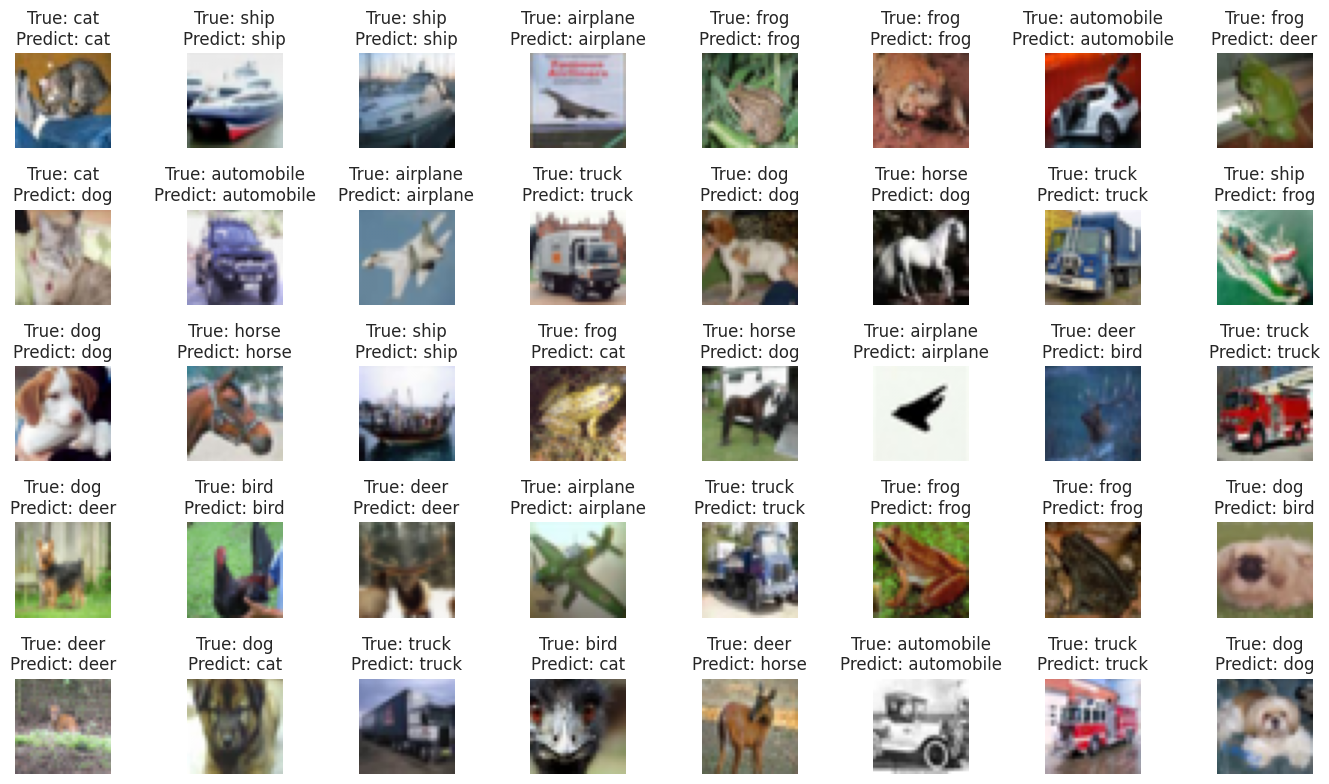

In [67]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
 layer.trainable = False
for layer in base_model.layers:
  print(layer.name, layer.trainable)
base_model.summary()


#model = Sequential([ base_model, Flatten(),Dense(256, activation='relu'),Dropout(0.5),Dense(10, activation='softmax')])

vgg16.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=64,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

#visualize the performance
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(history.history['accuracy'], color='red',)
plt.plot(history.history['val_accuracy'], color='black')
plt.title('Accuracy per Epoch')

plt.subplot(122)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')
plt.title('Loss per Epoch')


# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

print("Image Prediction")
image_evaluation(model,class_name, test_images, test_labels)

__Conclusion:__

Custom CNN is giving highest test accuracy of 73%
Other pretrianed models giving test accuracy between 60 to 65% and need more finetuning